<a href="https://colab.research.google.com/github/cogito288/samsung-ds-kaist/blob/master/code_0911/hawkes_process/HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hawkes process 호크 프로세스
https://github.com/MatthewDaws/PointProcesses

호크 프로세스는 포인트 프로세스의 한 종류로 먼저 포인트 프로세스에 대해서 알아보도록 하겠습니다.

**포인트 프로세스**는 어떠한 공간(space) 안에서 점으로 나타내어지는 프로세스를 말합니다. 점(point)이라는 표현 대신에 이벤트(event)라는 표현을 사용하기도 합니다. 포인트 프로세스는 어떠한 공간 혹은 시간대에 특정 이벤트가 얼마나 일어나는 지에 대해 표현하기 위해 사용합니다. 

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Poisson process 포아송 프로세스 

우선, 가장 간단한 포인트 프로세스인 포아송 프로세스 (Poisson process)에 대해 알아보겠습니다. 1시간축에서 표현되는 1차원 포아송 프로세스는 다음과 같은 특징을 가지고 있습니다.



*   시간 0일 때는 값이 0. 
*   한 이벤트가 일어난 후 **waiting time**이 지나고 한번에 하나씩, 또 다른 이벤트가 발생한다
*   waiting time은 지수 분포 (exponential distribution)에서 독립적으로 샘플링된다.

위와 같은 특성을 지닌 프로세스를 simulation 해보도록 하겠습니다. 포인트 프로세스를 표현하는 한 가지 방법은 이벤트가 일어난 시각을 표시하는 것으로 *points* 변수에 event가 일어난 시각을 저장하도록 하겠습니다.

In [0]:
def add_point(points, scale=2.0):
  wait_time = np.random.exponential(scale=2.0)
  if len(points) == 0:
    last = 0
  else:
    last = points[-1]
  points.append(last+wait_time)
  
def sample_poisson_process(window_size=100, scale=2.0):
  points = []
  add_point(points, scale)
  while points[-1] < window_size:
    add_point(points, scale)
  return points

In [3]:
points = sample_poisson_process()
points[:5]

[4.104471804563722,
 4.322170135399307,
 8.965072659350707,
 11.047345519944264,
 13.209086952837811]

In [0]:
def jitter():
    return (np.random.rand()-0.5)*0.2

def plot_series(series, title, window=[0,100]):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,1))

    ax.set(xlim=window, ylim=[-1,1], title=title, xlabel="Time", yticks=[])
    ax.xaxis.set_label_coords(0.95,-0.3)
    ax.scatter(x=series, y=[jitter() for i in range(len(series))], marker="o", color="black")

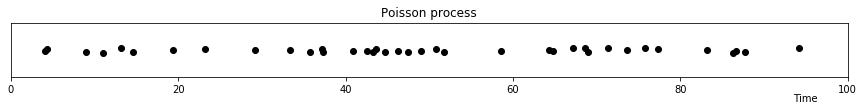

In [11]:
plot_series(points, title="Poisson process")

오버랩 된 이벤트들을 잘 볼 수 있도록, 약간의 트릭을 주어 이벤트를 같은 선상에 그리지 않고 랜덤하게 변화를 주었습니다.

exponential distribution과 Poisson process는 어떻게 연관이 되어 있을까요? 이것을 알아보기 위해 시간이 흘러감에 따라 이벤트가 발생하는 것이 아닌 이벤트들이 한꺼번에 생성된다고 생각해보겠습니다.



*   0에서 100까지의 시간대에서 몇 포인트를 랜덤하게 선택합니다.
*   그럴 때, 이 포인트들 사이의 간격은 exponential distribution을 따르며 각 간격은 독립적(independent)입니다. 


Poisson process를 바라보는 또 다른 관점은 어떤 특정 구간 [a, b]에 발생하는 이벤트의 수가 exponential distribution을 따른다는 것으로 설명할 수 있습니다. 



*   rate parameter $ \lambda $ 혹은 scale $\frac{1}{\lambda}$를 가지는 exponential distribution을 이용하여 이벤트 발생 간격을 샘플링한다고 가정합시다.
*   길이 $l=(b-a)$의 인터벌에서 발생하는 이벤트의 수는 $l\lambda$의 Poisson distribution을 따르게 됩니다.




Poisson process를 한번 샘플링하였을 때        [a, b]=[20, 50] 사이에 발생한 이벤트의 수 : 18


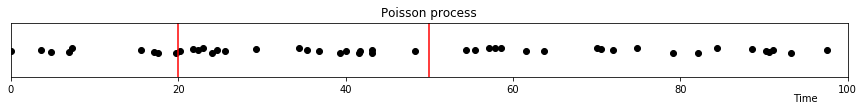

In [15]:
a, b = 20, 50
samples = 100000
scale = 2.0

points = sample_poisson_process()
cnt = 0
for x in points:
  if x >= a and x <= b: # x in [a, b]
    cnt += 1
print ('Poisson process를 한번 샘플링하였을 때 \
       [a, b]=[20, 50] 사이에 발생한 이벤트의 수 : {}'.format(cnt))

plot_series(points, title="Poisson process")
plt.axvline(x=a, color='red')
plt.axvline(x=b, color='red')

In [0]:
# Poisson process를 100,000번 샘플링하여 구간 [a, b]에 발생한 이벤트의 개수를 
# counts에 저장
counts = [
    sum(x >= a and x <= b for x in sample_poisson_process())
    for _ in range(samples)
]

expect = { x : scipy.stats.poisson.pmf(x, (b-a)/scale) for x in range(100) }

In [31]:
counts[:10]

[14, 13, 14, 12, 11, 23, 14, 8, 23, 15]

Text(0.5, 1.0, 'Events count')

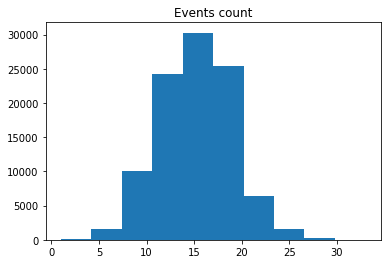

In [32]:
plt.hist(counts)
plt.title('Events count')

In [0]:
from collections import Counter

def find_percent_limits(counts, fraction=0.01):
    counter = Counter(counts)
    cutoff = len(counts) * fraction
    start = min(counter)
    while counter[start] < cutoff:
        start += 1
    end = max(counter)
    while counter[end] < cutoff:
        end -= 1
    return start, end
  
def histogram_with_expected(counts, expected, title):
    """Plot a histogram of the counts with an overlayed expected distribution.
    The counts should be samples from a discrete probability distribution.
    counts - an array or list of data to be binned.  Should be small integers.
    expected - a dict from integer count to probability
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=plt.figaspect(.6))

    start, end = find_percent_limits(counts, 0.001)
    ax.set(xlim=[start, end+1], title=title, xlabel="Count", ylabel="Frequency")
    xdata = np.arange(start, end+1)
    ax.xaxis.set_ticklabels(xdata)
    ax.xaxis.set_ticks(xdata + 0.5)
    # It would be easy to understand this 
    # if coutns = samples = number of samples = number of realizations
    ax.hist(counts, bins=range(0, max(counts)+1))
    data = []
    for x in xdata:
        if x in expected:
            data.append(expected[x] * len(counts))
        else:
            data.append(0)
    ax.plot(xdata + 0.5, data, marker="o", color="black")

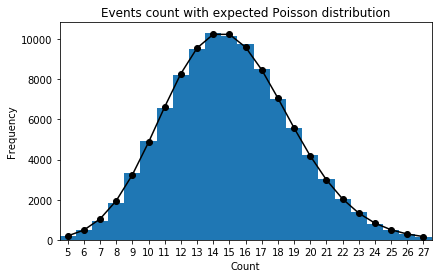

In [24]:
histogram_with_expected(counts, expect, title="Events count with expected Poisson distribution")

이번에는 간격을 시뮬레이션하지 않고 Poisson process를 직접 바로 시뮬레이션 해보도록 하겠습니다. 여기서 중요한 점은,


*   특정 개수의 이벤트가 어떤 간격에서 일어난다고 가정하였을 때, 그 사이에서 일어난 이벤트의 분포는 균등(uniform)하고 독립적이라는 사실입니다. 
*   이번 방식으로 Poisson proces를 샘플링하기 위해선, 첫째 일어난 이벤트의 개수 $N$을 Poisson distrbution에서 샘플링합니다.
*   그 다음 균등 분포(uniform distribution)을 이용하여 $N$개의 이벤트를 샘플링합니다.



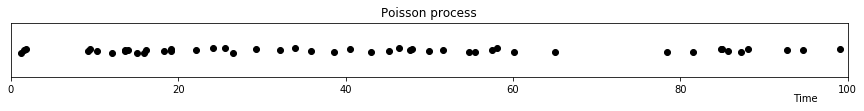

In [51]:
def sample_poisson_process_directly(window_size=100, scale=2.0):
    number_points = np.random.poisson(lam = window_size / scale)
    points = np.random.uniform(low=0, high=window_size, size=number_points)
    points.sort()
    return points

points = sample_poisson_process_directly()
plot_series(points, title="Poisson process")

Poisson process를 2차원에서 생각할 수도 있습니다. 시간적인 개념을 생각하지 않고 이벤트가 어떠한 공간에서 일어나는 것을 생각할 때, **spatial point process**라고 합니다. 


In [0]:
def plot_spatial(data, title, xwindow, ywindow):
    xsize = xwindow[1] - xwindow[0]
    ysize = ywindow[1] - ywindow[0]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=plt.figaspect(ysize / xsize))

    ax.set(xlim=xwindow, ylim=ywindow, title=title)
    ax.scatter(x=data[:,0], y=data[:,1])

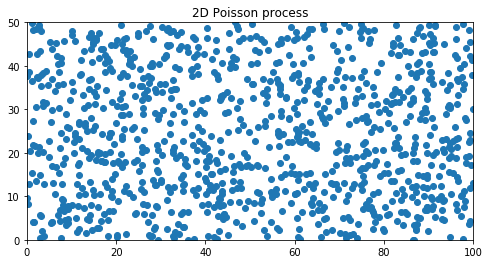

In [61]:
scale = 5.0
window_size = np.array([100,50])
number_points = np.random.poisson(window_size[0] * window_size[1] / scale)
points = np.random.rand(number_points, 2) * window_size

plot_spatial(points, "2D Poisson process", [0,100], [0,50])

## Temporal point process

이번에는 시간이 지남에 따라 발생하는 point process에 대해 알아보도록 하겠습니다.



*   가장 간단하게 말하자면, 시간축에서 일어나는 이벤트의 시퀀스입니다. $t_0<t_1<t_2<...$
*   t까지 일어난 이벤트의 기록을 history $\mathcal{H}_t$라고 표기합니다.
*   많이 쓰이는 표기방법은 $f^*(t)=f(t|\mathcal{H}_t)$이며 이는 현재까지 발생한 이벤트의 기록인 histroy가 주어졌을 때 다음 이벤트가 일어날 시간에 대한 밀도 함수(density function)입니다.


가장 간단한 예는 시간 간격이 똑같다면 일어날 이벤트의 개수도 똑같은 경우입니다. 이를 수학적으로 표현하자면, 이벤트 사이의 간격은 독립 항등 분포 (independently identically distributed I.I.D.)이라고 말할 수 있습니다. Poisson process의 경우 그 간격이 exponential distribution $f(s)=\lambda e^{-
\lambda s}$을 따릅니다.


이벤트가 일어날 확률이 이전에 일어났던 이벤트들에, 즉 history에 관련이 있을 경우에 대해 살펴보겠습니다. 이런 경우 $f^*$를 가지고 표현하기는 까다로워서 intensity function을 이용하여 이러한 프로세스를 표현합니다. 
$$
\lambda^*(t)=\frac{f^*(t)}{1-F^*(t)}
$$
여기서 $F^*(t)$는 누적 분포 함수(cumulative distribution function)입니다. 

$\lambda^*(t)$는 기록 $\mathcal{H}_t$을 가정할 때 시각 t 근처에서 일어날 이벤트의 평균 회수입니다. Simple Poisson process의 경우 $\lambda^*(t)=\lambda$로 일정합니다.


### Self-exciting process
이벤트가 일어난 것이 다음에 일어난 이벤트의 확률을 높이는 경우 self-exciting 특성이라고 하며 이러한 프로세스를 **Hawkes process**라고 합니다. 

$$
\lambda^*(t)=\mu+\alpha \sum_{t_i<t} \exp(-(t-t_i))
$$



*   $\mu$는 background intensity라고 합니다. 
*   과거에 일어났던 모든 이벤트들에 대하여 \alpha \exp(-(t-t_i))만큼의 지수적으로 줄어드는 intensity를 추가합니다.
*   즉, 한번 일어난 이벤트는 가까운 미래에 가장 크게 영향을 미치고 시간이 지날수록 그 영향은 줄어듭니다.
*   이러한 특성을 self-excite라고 합니다.


self-excite한 특성을 가지는 실제 사례는 어떤 것들이 있을까요? 주식 시장에서의 거래, 지진, 조직과 관련된 범죄 등이 있습니다.


이제 Hawkes process를 시뮬레이션 해보겠습니다.

In [0]:
def hawkes_intensity(mu, alpha, points, t):
    """Find the hawkes intensity:
    mu + alpha * sum( np.exp(-(t-s)) for s in points if s<=t )
    """
    p = np.array(points)
    p = p[p <= t]
    p = np.exp(p - t) * alpha
    return mu + np.sum(p)
    #return mu + alpha * sum( np.exp(s - t) for s in points if s <= t )

assert(np.isclose(1, hawkes_intensity(1,2,[],5)))
assert(np.isclose(2, hawkes_intensity(0,2,[5],5)))
assert(np.isclose(4, hawkes_intensity(2,2,[4.9999999],5)))
assert(np.isclose(2, hawkes_intensity(0,2,[4.9999999, 8],5)))
assert(np.isclose(1, hawkes_intensity(1,2,[5, 8],4)))

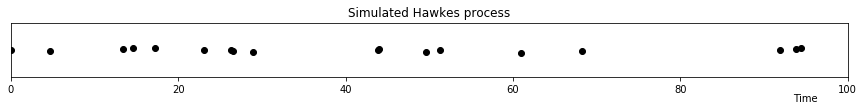

In [69]:
def simulate_hawkes(mu, alpha, window):
    t = 0
    points = []
    all_samples = []
    while t < window:
        m = hawkes_intensity(mu, alpha, points, t)
        s = np.random.exponential(scale = 1/m)
        ratio = hawkes_intensity(mu, alpha, points, t + s) / m
        if ratio >= np.random.uniform():
            points.append(t + s)
        all_samples.append(t + s)
        t = t + s
    return points, all_samples

window = 100
mu = 0.2
alpha = 0.05

points, all_samples = simulate_hawkes(mu, alpha, window)
    
plot_series(points, "Simulated Hawkes process")

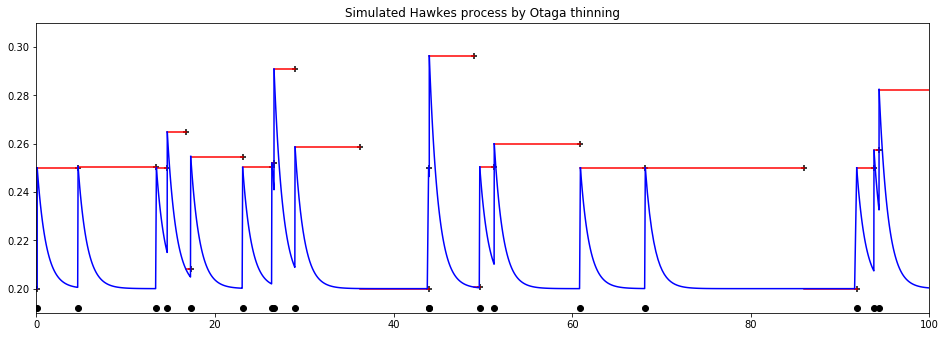

In [70]:
def slim_aspect():
    w, h = plt.figaspect(.1)
    return (w,1)
  
def add_intensity(ax, start, end, color):
    x = np.arange(101) / 100
    x = start + x * (end - start)
    y = [hawkes_intensity(mu, alpha, points, t) for t in x]
    ax.plot(x,y, color)

def add_homogeneous_intensity(ax, start, end, color):
    x = [start, end]
    y = hawkes_intensity(mu, alpha, points, start)
    y = [y, y]
    ax.plot(x,y, color)
    
width, _ = slim_aspect()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(width, width/3))

ax.set(ylim=[0.19,0.31], xlim=[0,100])
ax.set(title="Simulated Hawkes process by Otaga thinning")

ax.scatter(points, [0.192 for _ in points], marker='o', color="black")

add_homogeneous_intensity(ax, 0, all_samples[0], "red")
for (s, e) in zip(all_samples[:-1], all_samples[1:]):
    add_homogeneous_intensity(ax, s, e, "red")

add_intensity(ax, 0, points[0], "blue")
for i in range(1, len(points)):
    add_intensity(ax, points[i-1], points[i], "blue")

y = [hawkes_intensity(mu, alpha, points, t) for t in [0] + all_samples[:-1]]
_ = ax.scatter(all_samples, y, marker="+", color="black")

직접 코드를 작성하지 않고 미리 만들어진 라이브러리를 이용할 수도 있습니다. 오늘은 *tick* 라이브러리를 이용해보도록 하겠습니다. https://x-datainitiative.github.io/tick/modules/hawkes.html


In [83]:
!pip install tick

In [86]:
!wget https://raw.githubusercontent.com/X-DataInitiative/tick/master/tick/preprocessing/longitudinal_features_product.py -O /usr/local/lib/python3.6/dist-packages/tick/preprocessing/longitudinal_features_product.py

--2019-09-11 05:03:52--  https://raw.githubusercontent.com/X-DataInitiative/tick/master/tick/preprocessing/longitudinal_features_product.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10081 (9.8K) [text/plain]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/tick/preprocessing/longitudinal_features_product.py’

/usr/local/lib/pyth 100%[===================>]   9.84K  --.-KB/s    in 0s      

2019-09-11 05:03:52 (138 MB/s) - ‘/usr/local/lib/python3.6/dist-packages/tick/preprocessing/longitudinal_features_product.py’ saved [10081/10081]



In [87]:
from tick.hawkes import SimuHawkesSumExpKernels, HawkesSumExpKern, ModelHawkesSumExpKernLeastSq, HawkesExpKern

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tick.hawkes import HawkesKernel0, HawkesKernelExp, HawkesKernelPowerLaw, \
    HawkesKernelTimeFunc

In [0]:

kernel_0 = HawkesKernel0()
kernel_exp = HawkesKernelExp(.7, 1.3)                  # HawkesKernelExp(intensity, decay)
kernel_pl = HawkesKernelPowerLaw(.1, .2, 0.7)          # HawkesKernelPowerLaw(multiplier, cutoff, …)

t_values = np.array([0, 1, 1.5, 1.8, 2.7])
y_values = np.array([0, .6, .34, .2, .1])
kernel_tf = HawkesKernelTimeFunc(t_values=t_values, y_values=y_values)     # HawkesKernelTimeFunc([time_function, …])

kernels = [[kernel_0, kernel_exp], [kernel_pl, kernel_tf]]

In [0]:
t_values = np.linspace(0, 3, 100)
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20, 3))

kernels = [kernel_0, kernel_exp, kernel_pl, kernel_tf]
titles = ['Zero Kernel', 'Exponential', 'Power-law', 'Arbitrary time function']
for j in range(4):
    ax[j].plot(t_values, kernels[j].get_values(t_values),   # Simulation using get_values([times])
                  label=kernels[j])
    ax[j].legend(fontsize=15)
    ax[j].set_title(titles[j], fontsize=20)
plt.tight_layout()
plt.show()

## 리트윗 예측하기

In [13]:
!git clone https://github.com/NII-Kobayashi/TiDeH.git

Cloning into 'TiDeH'...
remote: Enumerating objects: 132, done.
remote: Total 132 (delta 0), reused 0 (delta 0), pack-reused 132
Receiving objects: 100% (132/132), 1.61 MiB | 4.19 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [0]:
import sys
import os
import datetime

from tick.hawkes import SimuHawkesSumExpKernels, HawkesSumExpKern, ModelHawkesSumExpKernLeastSq, HawkesExpKern
from tick.plot import plot_point_process, plot_basis_kernels, plot_hawkes_kernels
import itertools
import datetime
import numpy as np
import matplotlib.pyplot as plt

TIDEH_path = os.path.abspath('./TiDeH')
sys.path.insert(0, TIDEH_path)

In [0]:
# Module import
from tideh import estimate_parameters
from tideh import load_events
from tideh import predict
filename = os.path.join(TIDEH_path, 'data/example/sample_file.txt')
(_, start_time), events = load_events(filename)

In [0]:
# additional parameters passed to infectious rate function
add_params = {'t0': start_time, 'bounds': [(-1, 0.5), (1, 20.)]}
obs_time = 48 # observation time of 2 days
pred_time = 168 # predict for one week
params, err, _ = estimate_parameters(events=events, obs_time=obs_time, **add_params)

In [78]:
print("Estimated parameters are:")
print("p0:   %.3f" % params[0])
print("r0:   %.3f" % params[1])
print("phi0: %.3f" % params[2])
print("tm:   %.3f" % params[3])
print("Average %% error (estimated to fitted): %.2f" % (err * 100))

# predict future retweets
_, total, pred_error = predict(events=events, obs_time=obs_time, pred_time=pred_time, p_max=None, params=params,
                               **add_params)

print("Predicted number of retweets from %s to %s hours: %i" % (obs_time, pred_time, total))
print("Predicted number of retweets at hour %s: %i" % (pred_time,
                                                       len([e for e, _ in events if e <= obs_time]) + total))
print("Prediction error (absolute): %.0f" % pred_error)

Estimated parameters are:
p0:   0.001
r0:   0.414
phi0: 0.140
tm:   1.822
Average % error (estimated to fitted): 12.33
Predicted number of retweets from 48 to 168 hours: 37
Predicted number of retweets at hour 168: 2170
Prediction error (absolute): 20


## Estimating the kernel
### sample file

In [0]:
filename = os.path.join(TIDEH_path, 'data/example/sample_file.txt')
(_, start_time), events = load_events(filename)

In [0]:
%matplotlib inline

2019-09-11 05:08:13.340214
2019-09-11 05:08:13.350695


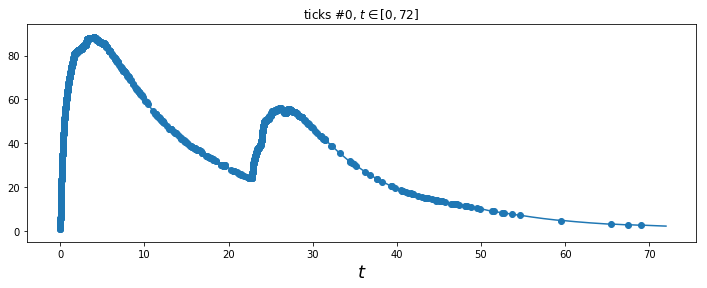

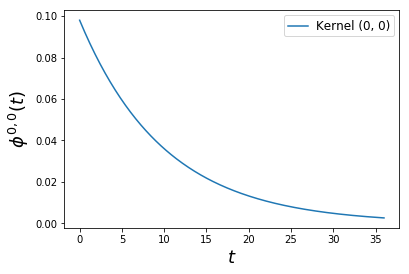

In [104]:
seqs = []
for seq in events:
    seqs.append(seq[0])
seqs = [np.asarray(seqs)]

decays = [0.1]
print (datetime.datetime.now())
learner = HawkesSumExpKern(decays, penalty='elasticnet', elastic_net_ratio=0.8)
learner.fit(seqs)
print (datetime.datetime.now())

flattend = list(itertools.chain.from_iterable(seqs))
t_min = int(np.ceil(np.min(flattend)))
t_max = int(np.floor(np.max(flattend)))

learner.plot_estimated_intensity(seqs, t_min=t_min, t_max=t_max)
fig = plot_hawkes_kernels(learner, show=True)



### Multiple training examples

In [0]:
from tideh import load_events_vec
from tideh import training_cross_validation

number_of_files = 100  # number of files to train on
file_name_prefix = os.path.join(TIDEH_path, 'data/training/RT')  # file names prefix of files used for training
iterations = 5 # number of cross validation iterations
pred_time = 168  # prediction time (hours)

# get file paths of files to use for training
file_names = [file_name_prefix + str(i) + '.txt' for i in range(1, number_of_files + 1)]

# load events for optimized training
events_data = []
for file in file_names:
    events_data.append(load_events_vec(file, 1 / 3600, 24))  # convert event_times and start_time to hours

In [0]:
seqs = []
for seq in events_data:
    seqs.append(seq[1][0])

In [107]:
decays = [0.1]
print (datetime.datetime.now())
learner = HawkesSumExpKern(decays, penalty='elasticnet', elastic_net_ratio=0.8, n_baselines=2, period_length=100)
learner.fit(seqs)
print (datetime.datetime.now())

2019-09-11 05:08:34.698359
2019-09-11 05:08:45.174359


In [0]:
flattend = list(itertools.chain.from_iterable(seqs))
t_min = int(np.ceil(np.min(flattend)))
t_max = int(np.floor(np.max(flattend)))

2019-09-11 05:08:49.013840


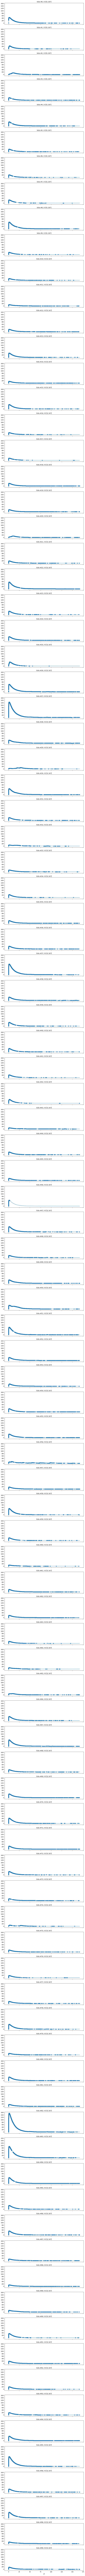

2019-09-11 05:09:34.203592


In [109]:
print (datetime.datetime.now())
learner.plot_estimated_intensity(seqs, t_min=t_min, t_max=t_max)
print (datetime.datetime.now())

In [0]:
fig = plot_hawkes_kernels(learner, show=True)